In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/Project/Normal-Data-Visulization/datasets/Covid-19/day_wise.csv')
df.head()

,Date,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,No. of countries
0,2020-01-22,555,17,28,510,0,0,0,3.06,5.05,60.71,6
1,2020-01-23,654,18,30,606,99,1,2,2.75,4.59,60.00,8
2,2020-01-24,941,26,36,879,287,8,6,2.76,3.83,72.22,9
3,2020-01-25,1434,42,39,1353,493,16,3,2.93,2.72,107.69,11
4,2020-01-26,2118,56,52,2010,684,14,13,2.64,2.46,107.69,13


What is the trend of new cases, new deaths, and new recoveries over time?

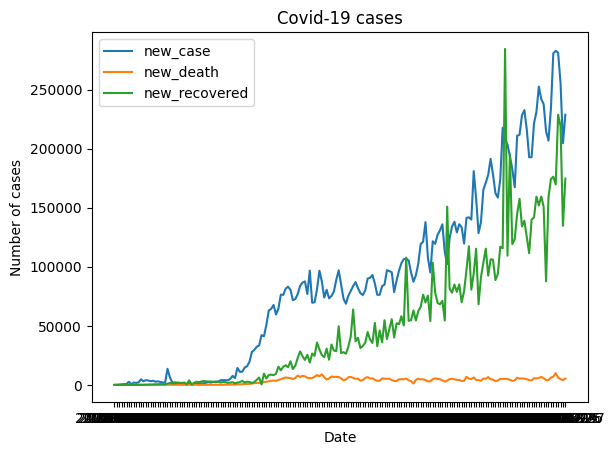

In [3]:
plt.plot(df['Date'], df['New cases'], label='new_case')
plt.plot(df['Date'], df['New deaths'], label='new_death')
plt.plot(df['Date'], df['New recovered'], label='new_recovered')
plt.xlabel('Date')
plt.ylabel('Number of cases')
plt.title('Covid-19 cases')
plt.legend()

Calculate the rolling average for confirmed cases over a 7-day window.

In [4]:
df['Confirmed'].rolling(window=7).mean()

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
183    1.475036e+07
184    1.499851e+07
185    1.524923e+07
186    1.549851e+07
187    1.575091e+07
Name: Confirmed, Length: 188, dtype: float64

Determine the correlation between the number of new cases and new deaths.

In [5]:
df[['New cases' , 'New deaths']].corr()

,New cases,New deaths
New cases,1.000000,0.721846
New deaths,0.721846,1.000000


Visualize the distribution of daily new cases using a histogram.

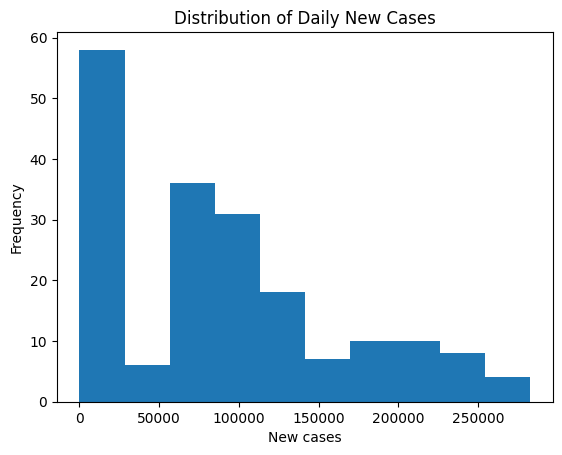

In [6]:
plt.hist(df['New cases'], bins=10)
plt.xlabel('New cases')
plt.ylabel('Frequency')
plt.title('Distribution of Daily New Cases')
plt.show()

Create a heatmap showing the correlation between all numerical columns.

<Axes: >

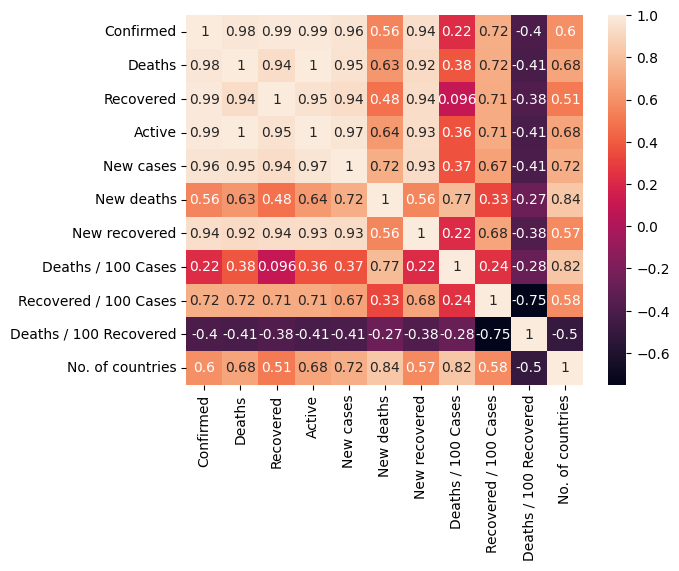

In [7]:
temp = df[['Confirmed', 'Deaths', 'Recovered', 'Active' , 'New cases', 'New deaths', 'New recovered' , 'Deaths / 100 Cases', 'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries']].corr()
sns.heatmap(temp, annot=True)

Calculate the cumulative sum of deaths and plot it over time.

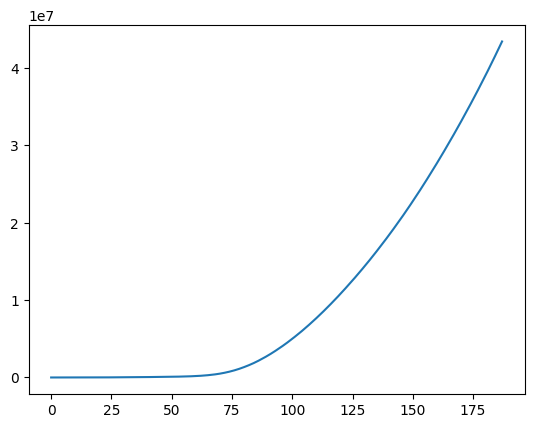

In [8]:
df['Deaths'].cumsum()
plt.plot(df['Deaths'].cumsum())

Identify and visualize any outliers in the daily new cases column.

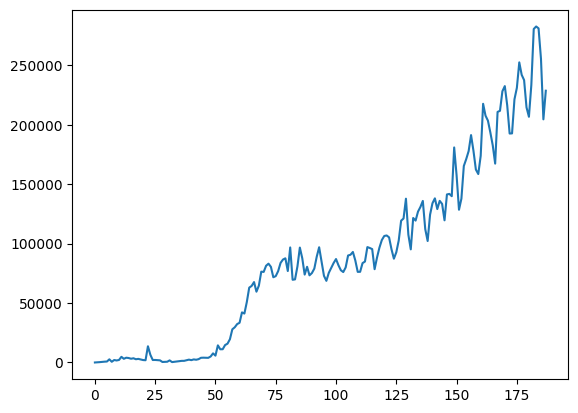

In [9]:
plt.plot(df['New cases'])

Perform a time series decomposition on the confirmed cases to analyze the trend, seasonality, and residuals.

Create a line plot comparing the death rate and recovery rate over time.

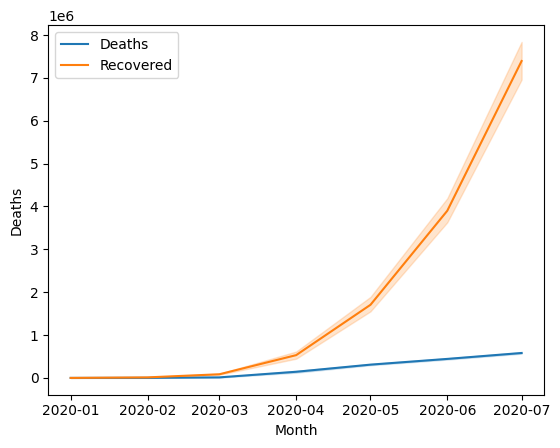

In [10]:
# Create a Month column from the Date column
df['Month'] = pd.to_datetime(df['Date']).dt.to_period('M')

# Convert Month column to datetime for plotting
df['Month'] = df['Month'].dt.to_timestamp()

sns.lineplot(x='Month', y='Deaths', data=df, label='Deaths')
sns.lineplot(x='Month', y='Recovered', data=df, label='Recovered')
plt.legend()
plt.show()

Calculate the growth rate of confirmed cases week over week.

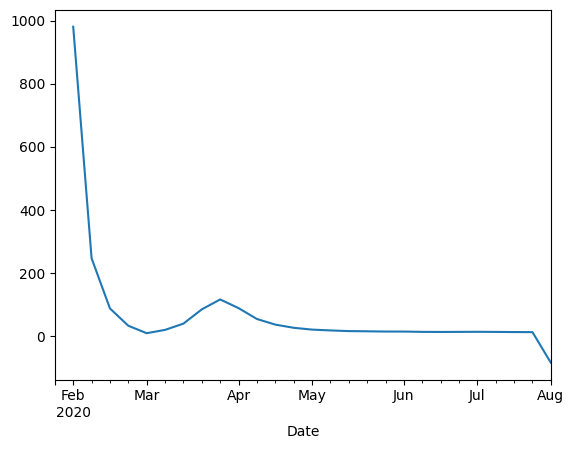

In [11]:
# Reset the index to access the 'Date' column
df.reset_index(inplace=True)

# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' column as the index
df.set_index('Date', inplace=True)

# Resample the data to get weekly cases
weekly_cases = df['Confirmed'].resample('W').sum()

# Calculate the weekly growth rate
weekly_growth_rate = weekly_cases.pct_change() * 100

weekly_growth_rate.plot()

df.reset_index(inplace=True)

Visualize the top 10 days with the highest number of new cases.

In [12]:
df[['Date', 'New cases']].nlargest(10, 'New cases').reset_index(drop=True)

,Date,New cases
0,2020-07-23,282756
1,2020-07-24,281164
2,2020-07-22,280647
3,2020-07-25,255545
4,2020-07-16,252544
5,2020-07-17,242038
6,2020-07-18,237635
7,2020-07-21,233565
8,2020-07-10,232577
9,2020-07-15,231122


Compare the average number of new cases before and after February 15, 2020.

In [13]:
before = df[df['Date'] < '2020-02-15']['New cases'].mean()
after = df[df['Date'] >= '2020-02-15']['New cases'].mean()

# Create a DataFrame to compare the averages
comparison = pd.DataFrame({'Period': ['Before Feb 15', 'After Feb 15'], 'Average New Cases': [before, after]})
comparison

,Period,Average New Cases
0,Before Feb 15,2755.62500
1,After Feb 15,100212.29878


Plot a scatter plot of new cases against new deaths and fit a regression line.

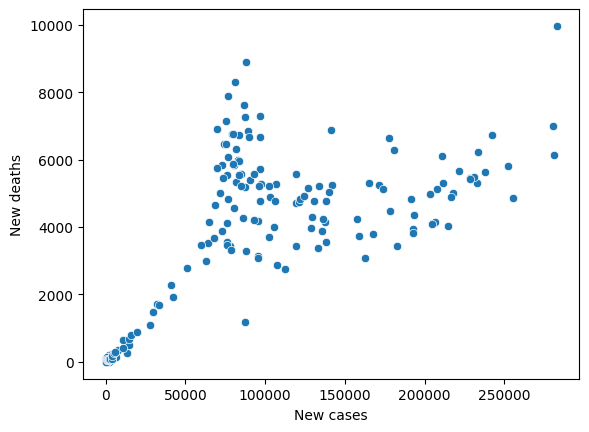

In [14]:
sns.scatterplot(x='New cases' , y='New deaths', data=df)
plt.show()

Identify any significant changes in the data using a change point detection algorithm.

In [17]:
#This will see after ML

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188 entries, 0 to 187
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    188 non-null    datetime64[ns]
 1   index                   188 non-null    int64         
 2   Confirmed               188 non-null    int64         
 3   Deaths                  188 non-null    int64         
 4   Recovered               188 non-null    int64         
 5   Active                  188 non-null    int64         
 6   New cases               188 non-null    int64         
 7   New deaths              188 non-null    int64         
 8   New recovered           188 non-null    int64         
 9   Deaths / 100 Cases      188 non-null    float64       
 10  Recovered / 100 Cases   188 non-null    float64       
 11  Deaths / 100 Recovered  188 non-null    float64       
 12  No. of countries        188 non-null    int64     

Create a pair plot of all numerical columns to explore potential relationships.

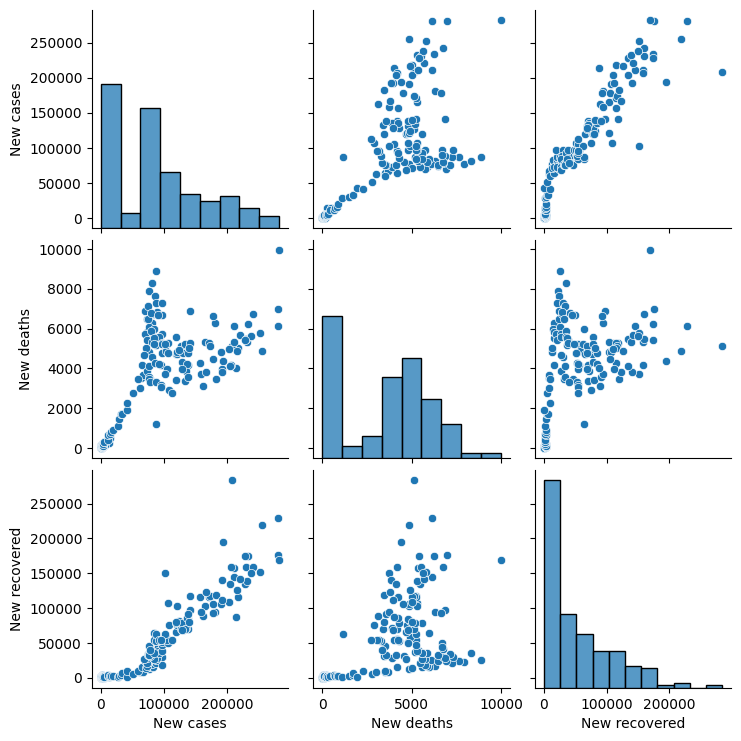

In [16]:
sns.pairplot(df[['New cases', 'New deaths', 'New recovered']])

Calculate and visualize the daily increase in active cases.